In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from autoencoder import Autoencoder
from solver import train_vali_all_epochs, dev_train_vali_all_epochs, test

In [2]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_size = int(len(mnist_train) * 0.8)
validation_size = len(mnist_train) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [train_size, validation_size])

batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=6)
validation_loader = DataLoader(mnist_val, batch_size=batch_size, shuffle=False, num_workers=6)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=6)

In [3]:
save_path = os.getenv("HOME") + '/sparsify_models/good_models/05/'

In [ ]:
sae_model = Autoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
sae_optimizer = torch.optim.SGD(sae_model.parameters(), lr=0.1, momentum=0.9)

sae_train_loss, sae_validation_loss = train_vali_all_epochs(
    sae_model, 
    train_loader, 
    validation_loader, 
    sae_optimizer, 
    n_epochs=50, 
    device=torch.device('cuda'), 
    save_path=save_path+'SAE/'
    )

Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000418: 100%|██████████| 375/375 [00:01<00:00, 241.87it/s]

====> Epoch: 0 Average loss: 0.0655


====> Test set loss: 0.0528
Directory created: /home/david/sparsify_models/good_models/xy/SAE/
Weights saved.


Train Epoch: 1 [47872/48000 (100%)]	Loss: 0.000327: 100%|██████████| 375/375 [00:01<00:00, 226.71it/s]

====> Epoch: 1 Average loss: 0.0454


====> Test set loss: 0.0402
Weights saved.


Train Epoch: 2 [47872/48000 (100%)]	Loss: 0.000273: 100%|██████████| 375/375 [00:01<00:00, 233.38it/s]


====> Epoch: 2 Average loss: 0.0375


/tmp/ipykernel_15633/1333565373.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Validation Loss SAE')

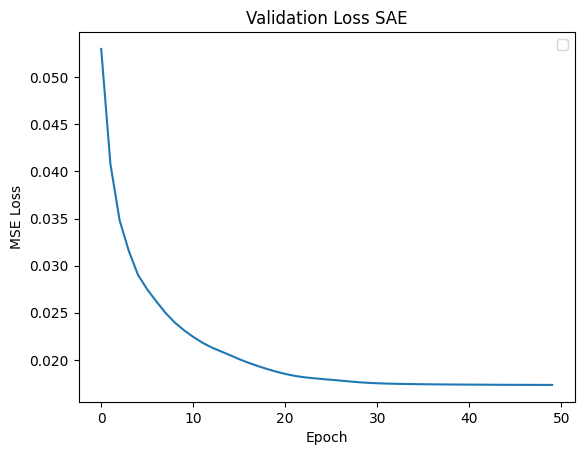

In [5]:
plt.figure()
plt.plot(sae_validation_loss)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Validation Loss SAE')

In [5]:
dae_model = Autoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
dae_optimizer = torch.optim.SGD(dae_model.parameters(), lr=0.1, momentum=0.9)

size_ls = [4, 4, 4, 4, 4, 10,
           10, 10, 10, 10, 16, 16,
           16, 16, 16, 16, 16, 24,
           24, 24, 24, 24, 24, 24, 
           32, 32, 32, 32, 32, 32,
           32, 32, 32, 32, 32, 32, 
           32, 32, 32, 32, 32, 32, 
           32, 32, 32, 32, 32, 32, 
           32, 32]

manner = 'cell_division'

dae_validation_loss, dae_validation_loss = dev_train_vali_all_epochs(
    dae_model, 
    size_ls,
    manner,
    train_loader,
    validation_loader, 
    dae_optimizer, 
    n_epochs=50,
    device=torch.device('cpu'), 
    save_path=save_path+'DAE/'
    )

Directory created: /home/david/sparsify_models/good_models/xy/DAE/
[ 4  4  4  4  4 10 10 10 10 10 16 16 16 16 16 16 16 24 24 24 24 24 24 24
 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32]
4


Train Epoch: 0 [47872/48000 (100%)]	Loss: 0.000949: 100%|██████████| 375/375 [00:03<00:00, 118.94it/s]


====> Epoch: 0 Average loss: 0.1215


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.1213
Weights saved.
4
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(save_path + 'model_weights_epoch

KeyboardInterrupt: 

/tmp/ipykernel_15633/2794373521.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Validation Loss DAE')

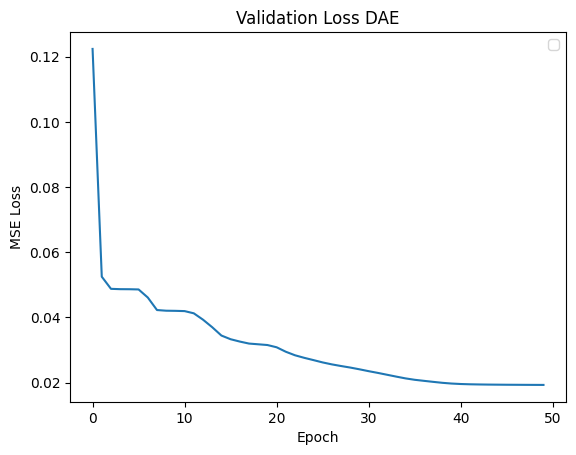

In [7]:
plt.figure()
plt.plot(dae_validation_loss)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Validation Loss DAE')

In [8]:
dae_validation_loss[-1]

0.01926649698710188

Text(0.5, 1.0, 'Test Loss DAE')

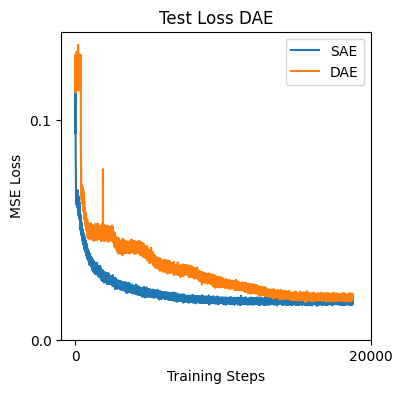

In [9]:
sae_train_loss_all = np.load(save_path + 'SAE/' + 'all_train_losses.npy')
dae_train_loss_all = np.load(save_path + 'DAE/' + 'all_train_losses.npy')

plt.figure(figsize=(4, 4))
plt.plot(np.concatenate(sae_train_loss_all), label='SAE')
plt.plot(np.concatenate(dae_train_loss_all), label='DAE')
plt.legend()
plt.xticks([0, 20000])
plt.yticks([0, 0.1])
plt.xlabel('Training Steps')
plt.ylabel('MSE Loss')
plt.title('Test Loss DAE')

# Plot the reconstructed images
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(5,10,i+1)
    plt.imshow(np.transpose(data[i].cpu().numpy(),(1,2,0)))
    plt.axis('off')

    plt.subplot(5,10,i+11)
    plt.imshow(np.transpose(decoded_sae[i].detach().cpu().numpy().reshape(1,28,28),(1,2,0)))
    plt.axis('off')

    plt.subplot(5,10,i+21)
    plt.imshow(np.transpose(decoded_dae_loaded[i].detach().cpu().numpy().reshape(1,28,28),(1,2,0)))
    plt.axis('off')

    plt.subplot(5,10,i+31)
    plt.imshow(np.transpose(decoded_dae[i].detach().numpy().reshape(1,28,28),(1,2,0)))
    plt.axis('off')

    plt.subplot(5,10,i+41)
    plt.imshow(np.transpose(decoded_dae_loaded[i].detach().numpy().reshape(1,28,28),(1,2,0)))
    plt.axis('off')

plt.show()